In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [9]:
data = pd.read_csv('amazon.csv', encoding='latin1', parse_dates=['date'])

In [10]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [11]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [12]:
data['date']

0      1998-01-01
1      1999-01-01
2      2000-01-01
3      2001-01-01
4      2002-01-01
          ...    
6449   2012-01-01
6450   2013-01-01
6451   2014-01-01
6452   2015-01-01
6453   2016-01-01
Name: date, Length: 6454, dtype: datetime64[ns]

In [13]:
data.shape

(6454, 5)

In [16]:
data.duplicated().sum()

32

In [18]:
print("There are", data.duplicated().sum(), "duplicated rows")

There are 32 duplicated rows


In [19]:
# Dropping duplicate values
data.drop_duplicates(inplace=True)

In [20]:
data.duplicated().sum()

0

In [21]:
# Checking for null values
data.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [27]:
# Changin month names
data['month_new'] = data['month'].map({
    'Janeiro': 'January',
    'Fevereiro': 'February',
    'Março': 'March', 
    'Abril': 'April', 
    'Maio': 'May', 
    'Junho': 'June', 
    'Julho': 'July',
    'Agosto': 'August', 
    'Setembro': 'September', 
    'Outubro': 'October', 
    'Novembro': 'November', 
    'Dezembro': 'December'
})

In [28]:
data.head()

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,January
1,1999,Acre,Janeiro,0.0,1999-01-01,January
2,2000,Acre,Janeiro,0.0,2000-01-01,January
3,2001,Acre,Janeiro,0.0,2001-01-01,January
4,2002,Acre,Janeiro,0.0,2002-01-01,January


In [29]:
data['month_new'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [33]:
# Which month has the most fires?
data.groupby('month_new')['number'].sum().sort_values(ascending=False).reset_index()

,month_new,number
0,July,92319.113
1,October,88681.579
2,August,88050.435
3,November,85508.054
4,September,58578.305
5,December,57535.480
6,June,55997.675
7,January,47681.844
8,May,34725.363
9,February,30839.050


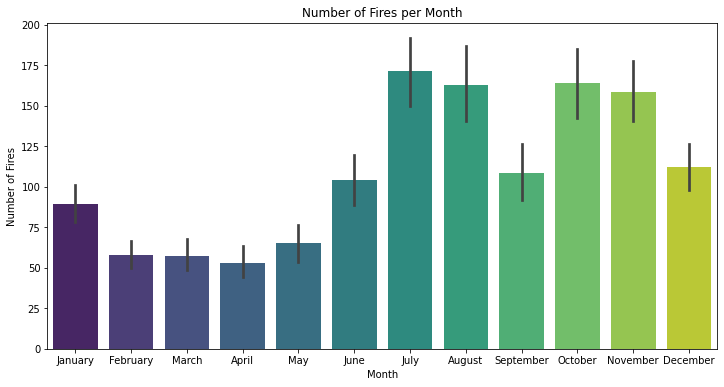

In [36]:
# Visualizing the number of fires per month
plt.figure(figsize=(12, 6))
sns.barplot(x='month_new', y='number', data=data, palette='viridis')
plt.title('Number of Fires per Month')
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.show()